**パッケージのインポート**

In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler

**データを読み込む**

In [3]:
train = pd.read_csv('../input/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('../input/store-sales-time-series-forecasting/test.csv')
submission = pd.read_csv('../input/store-sales-time-series-forecasting/sample_submission.csv')
#stores = pd.read_csv('../input/store-sales-time-series-forecasting/stores.csv')
#events=pd.read_csv('../input/store-sales-time-series-forecasting/holidays_events.csv')
#treventsans = pd.read_csv('../input/store-sales-time-series-forecasting/transactions.csv')

In [4]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [5]:
train['year']  = pd.to_datetime(train['date']).dt.year
train['month']  = pd.to_datetime(train['date']).dt.month
train['day']  = pd.to_datetime(train['date']).dt.day

test['year']  = pd.to_datetime(test['date']).dt.year
test['month']  = pd.to_datetime(test['date']).dt.month
test['day']  = pd.to_datetime(test['date']).dt.day

In [6]:
train

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15


In [7]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

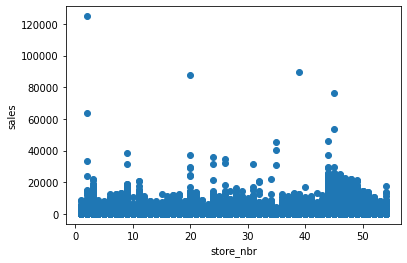

In [8]:
x = train["store_nbr"]
y = train["sales"]
 
# 散布図を描画
plt.scatter(x, y)
plt.xlabel("store_nbr")
plt.ylabel("sales")
fig.savefig("img1.jpg")

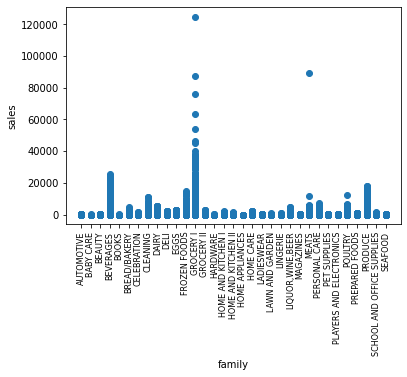

In [9]:
x = train["family"]
y = train["sales"]
 
# 散布図を描画
plt.scatter(x, y)
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("family")
plt.ylabel("sales")
fig.savefig("img2.jpg")

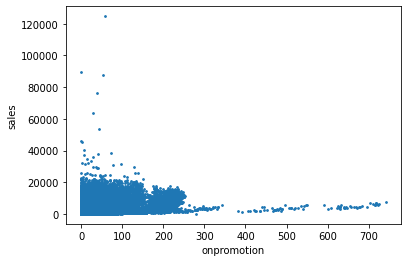

In [10]:
x = train["onpromotion"]
y = train["sales"]
 
# 散布図を描画
plt.scatter(x, y,s=3)
#plt.xticks(rotation=90)
plt.xlabel("onpromotion")
plt.ylabel("sales")
fig.savefig("img3.jpg")

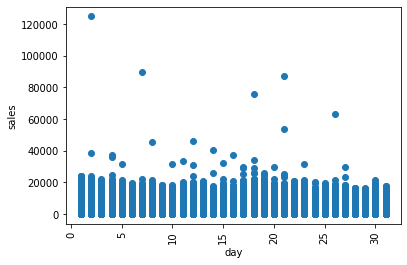

In [11]:
x = train["day"]
y = train["sales"]
 
# 散布図を描画
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.xlabel("day")
plt.ylabel("sales")
fig.savefig("img4.jpg")

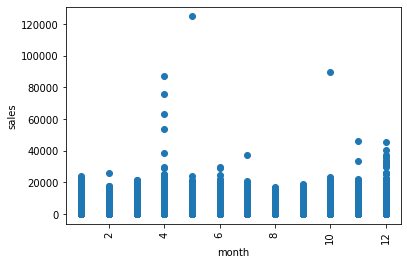

In [12]:
x = train["month"]
y = train["sales"]
 
# 散布図を描画
plt.scatter(x, y)
plt.xticks(rotation=90)
plt.xlabel("month")
plt.ylabel("sales")
fig.savefig("img5.jpg")

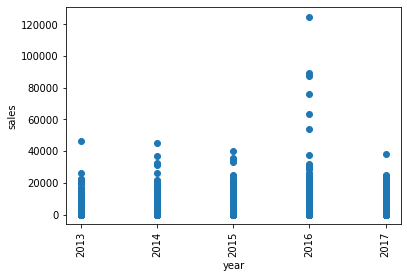

In [13]:
x = train["year"]
y = train["sales"]
 
# 散布図を描画
plt.scatter(x, y)
plt.xticks([2013,2014,2015,2016,2017],rotation=90)
plt.xlabel("year")
plt.ylabel("sales")
fig.savefig("img6.jpg")

In [14]:
train

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000,0,2013,1,1
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,2017,8,15
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,2017,8,15
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,2017,8,15
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,2017,8,15


In [15]:
train_standard =  MinMaxScaler()
train_copied = train.copy()
train_standard.fit(train_copied[['onpromotion']])
train_std = pd.DataFrame(train_standard.transform(train_copied[['onpromotion']]))

train['onpromotion'] = train_std

#train_standard =  StandardScaler()
#train_copied = train.copy()
#train_standard.fit(train_copied[['onpromotion']])
#train_std = pd.DataFrame(train_standard.transform(train_copied[['onpromotion']]))

#train['onpromotion'] = train_std

In [16]:
test_standard =  MinMaxScaler()
test_copied = test.copy()
test_standard.fit(test_copied[['onpromotion']])
test_std = pd.DataFrame(test_standard.transform(test_copied[['onpromotion']]))

test['onpromotion'] = test_std

In [17]:
train

,id,date,store_nbr,family,sales,onpromotion,year,month,day
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0.000000,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.000,0.000000,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.000,0.000000,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.000,0.000000,2013,1,1
4,4,2013-01-01,1,BOOKS,0.000,0.000000,2013,1,1
...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0.000000,2017,8,15
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,0.001350,2017,8,15
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,0.199730,2017,8,15
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,0.010796,2017,8,15


In [18]:
test

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0.000000,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0.000000,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,0.003096,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,0.030960,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0.000000,2017,8,16
...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,0.001548,2017,8,31
28508,3029396,2017-08-31,9,PREPARED FOODS,0.000000,2017,8,31
28509,3029397,2017-08-31,9,PRODUCE,0.001548,2017,8,31
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,0.013932,2017,8,31


In [19]:
train = pd.get_dummies(train,columns = ['family','store_nbr'],drop_first=True)#カテゴリ変数をダミー変数
test = pd.get_dummies(test,columns = ['family','store_nbr'],drop_first=True)#カテゴリ変数をダミー変数

In [20]:
train_x = train.copy()
train_x.drop(columns = ['sales','id','date','year'] , inplace = True , axis = 1)

#train_x.drop(columns = ['year'] , inplace = True , axis = 1)
train_y = train.sales


test_x = test.copy()
test_x.drop(columns = ['id','date','year'] , inplace = True , axis = 1)

#train_x.drop(columns = ['year'] , inplace = True , axis = 1)
test_x

,onpromotion,month,day,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54
0,0.000000,8,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,8,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.003096,8,16,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.030960,8,16,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,8,16,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,0.001548,8,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28508,0.000000,8,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28509,0.001548,8,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28510,0.013932,8,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df=train_x
#def minmax_norm(df_input):
#    return (df - df.min()) / ( df.max() - df.min())

#train_x1= minmax_norm(df)

#print(train_x1)
df

,onpromotion,month,day,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54
0,0.000000,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,0.000000,8,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3000884,0.001350,8,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3000885,0.199730,8,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3000886,0.010796,8,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df=train_y


In [23]:
#df=train_y
#def minmax_norm(df_input):
#    return (df - df.min()) / ( df.max() - df.min())

#train_y1= minmax_norm(df)

#print(train_y1)

学習開始

In [24]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [25]:
model.coef_
#重み確認

array([ 1.34196478e+04,  4.76029711e+00, -1.54980899e+00, -5.04871361e+00,
       -4.11814483e+00,  2.20002097e+03, -5.07788973e+00,  3.92210337e+02,
        1.88287630e+00,  9.35596593e+02,  5.58881947e+02,  1.43817193e+02,
        1.27452509e+02,  1.24597867e+02,  3.39048487e+03,  1.49721835e+01,
       -4.04331553e+00,  5.97719257e+00,  5.03872369e+00, -4.70276207e+00,
        1.31770377e+02,  1.67736548e+00, -1.34531918e+00,  1.47282535e+00,
        7.07386880e+01, -2.27875325e+00,  2.76153161e+02,  2.16107350e+02,
       -1.87467103e+00,  6.64957013e-01,  3.00291162e+02,  8.41484947e+01,
        1.12156601e+03, -5.08775226e+00,  9.23717692e+00,  1.26823505e+02,
        6.41143094e+02,  8.12052581e+01,  2.23465251e+01,  1.88293236e+02,
        2.25291509e+02,  2.83885204e+02,  2.07875295e+02, -7.01959079e+01,
        2.43518293e+02, -5.60897070e+01, -5.40431670e+01, -4.14710508e+01,
       -4.27009147e+01, -4.90743784e+01,  7.03312681e+01, -1.46550388e+01,
       -1.11143681e+01, -

In [26]:
model.intercept_
#切片の確認

-101.2619951613766

In [27]:
test_x
#df=test_x
#def minmax_norm(df_input):
#    return (df - df.min()) / ( df.max() - df.min())

#test_x1= minmax_norm(df)

#print(test_x1)

,onpromotion,month,day,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,store_nbr_45,store_nbr_46,store_nbr_47,store_nbr_48,store_nbr_49,store_nbr_50,store_nbr_51,store_nbr_52,store_nbr_53,store_nbr_54
0,0.000000,8,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,8,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.003096,8,16,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.030960,8,16,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,8,16,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,0.001548,8,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28508,0.000000,8,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28509,0.001548,8,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28510,0.013932,8,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
pred = model.predict(test_x)

In [29]:
pred

array([ -87.97656207,  -93.02527567,  -50.54780969, ..., 1238.99105515,
        278.5248838 ,  105.88877555])

In [30]:
submission

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


In [31]:
submission['sales'] = pred
submission.to_csv('submission.csv',index=False)

In [32]:
submission

,id,sales
0,3000888,-87.976562
1,3000889,-93.025276
2,3000890,-50.547810
3,3000891,2527.513381
4,3000892,-93.054452
...,...,...
28507,3029395,417.716209
28508,3029396,180.800093
28509,3029397,1238.991055
28510,3029398,278.524884
